# 원, 삼각형, 사각형 구분
- 어려운 테스트 문제를 데이터 부풀리기를 이용해 데이터를 많이 생성
- 기존 CNN 모델 사용

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/Colab Notebooks/DeepLearning_2022_05/data/handwriting_shape.zip' -d hard_handwriting > /dev/null

In [3]:
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

- 데이터셋 생성

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.5,
    zoom_range=[0.8,1.5],
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

In [6]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

img=load_img('/content/hard_handwriting/train/triangle/triangle001.png')
x=img_to_array(img)
x.shape


(24, 24, 3)

In [7]:
x=x.reshape((1,)+x.shape)
x.shape


(1, 24, 24, 3)

- 데이터 부풀리기를 통해 만들어지는 새로운 도형 이미지

In [8]:
import os
if not os.path.exists('preview'):
    os.mkdir('preview')

In [9]:
count=0
for _ in train_datagen.flow(x, batch_size=1,save_to_dir='preview',save_prefix='pre'):
    count +=1
    if count >=30:
        break

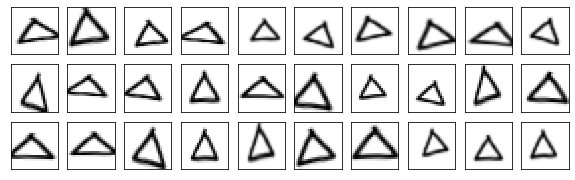

In [10]:
plt.figure(figsize=(10,3))
for i, fname in enumerate(glob('preview/*.png')):
    img=Image.open(fname)
    plt.subplot(3,10,i+1)
    plt.imshow(img),plt.xticks([]),plt.yticks([])
plt.show()

- data generator

In [18]:
train_data_generator = train_datagen.flow_from_directory(
    'hard_handwriting/train', target_size=(24,24),
    batch_size=3, class_mode='categorical'
)

Found 45 images belonging to 3 classes.


In [19]:
test_datagen=ImageDataGenerator(rescale=1/255.)
test_data_generator = test_datagen.flow_from_directory(
    'hard_handwriting/test', target_size=(24,24),
    batch_size=3, class_mode='categorical'
)

Found 15 images belonging to 3 classes.


- 모델 정의/설정/학습

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed=2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [14]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D,Flatten, MaxPooling2D, Dropout
#flatten - 3차원인 conv2D를 1차원인 dense, fully connected layer로 
#넣어야 하기 때문에 차원 축소를 할 때 필요.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [15]:
model= Sequential([
                   Conv2D(32,(3,3),input_shape=(24,24,3),activation='relu'),
                    Conv2D(32,(3,3),activation='relu'),
                   MaxPooling2D(),
                    Flatten(),
                   Dense(128,activation='relu'),
                   Dense(3,activation='softmax')   
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               409728    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                        

In [16]:
model.compile('adam','categorical_crossentropy',['accuracy'])

In [20]:
model.fit(
    train_data_generator,
    steps_per_epoch=15, #45/3
    epochs=300,
    validation_data=test_data_generator,
    validation_steps=5
)

Epoch 1/300
15/15 [==============================] - 0s 11ms/step - loss: 1.0472e-04 - accuracy: 1.0000 - val_loss: 5.5631e-08 - val_accuracy: 1.0000
Epoch 2/300
15/15 [==============================] - 0s 7ms/step - loss: 1.1226e-04 - accuracy: 1.0000 - val_loss: 5.5631e-08 - val_accuracy: 1.0000
Epoch 3/300
15/15 [==============================] - 0s 7ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.5895e-08 - val_accuracy: 1.0000
Epoch 4/300
15/15 [==============================] - 0s 8ms/step - loss: 6.4088e-04 - accuracy: 1.0000 - val_loss: 7.9473e-09 - val_accuracy: 1.0000
Epoch 5/300
15/15 [==============================] - 0s 7ms/step - loss: 2.7340e-05 - accuracy: 1.0000 - val_loss: 7.9473e-09 - val_accuracy: 1.0000
Epoch 6/300
15/15 [==============================] - 0s 7ms/step - loss: 9.6874e-04 - accuracy: 1.0000 - val_loss: 7.9473e-09 - val_accuracy: 1.0000
Epoch 7/300
15/15 [==============================] - 0s 7ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss

In [21]:
model.evaluate(test_data_generator)

5/5 [==============================] - 0s 3ms/step - loss: 7.9473e-09 - accuracy: 1.0000


[7.947285496356926e-09, 1.0]